a. transacciones fraudulentas

b. power users que de manera recurrente compran en nuestras compañías y a quienes les podemos hacer promociones

Para completar el reto esperamos que tengas completo para procesar la información
montar la información en una basa de datos (puede ser en tu local o en la nube).
Hacer un modelo para al menos uno de los dos casos mencionados al inicio (el modelo debe de arrojar las razones de declinación o de promoción).
Implementer el modelo a los datos que se alojan en la base de datos que construiste
El modelo debe ser un programa preparado para recibir información sin tu interacción
El día de la revisión de la prueba.
No es necesaria una presentación, pero si requerimos que estés preparado para explicarnos tu pipeline y las decisiones sobre el o los modelos que usaste.
Te pasaremos más información que tendrá que ser evaluada por tu modelo, sin tu interacción y con las razones arrojadas por tu programa debemos entender los motivos por los cuales el modelo tomo ciertas decisiones.

In [589]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [539]:
XFORCE = pd.read_csv('../Datos/XFORCE_ds_technical_test_2019_charges_201912231910.csv', dtype = 'object')

XFORCE

,charge_id,company_id,company_name,created_at,paid_at,amount,status,fraud_status,failure_code,email_hash,device_hash,card,exp_year,exp_month
0,6878a36a40772b99fd62ebf51747f6d899e4d30c,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-01 00:00:10,NaN,300,pending_payment,A,card_declined,beb58e5aec408bfc244b39e972bb2b0719513f0d,2c631eb2eb054111b437ec548b7e309692e95bf9,1081edc2a9cd9a87ab345f13776796c38266ab28,27,08
1,f91937ed60f566e1bd9cc5628d264a1bc15f8b31,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-01 00:00:16,NaN,300,voided,A,NaN,a3d7e6fd32e706d85f84a9ad7364081a24f6f168,1bdbc502d83c448c6395fef162a1d8f239aa347a,db64f19126cc558ed69e1820590cd615ba62e13d,24,02
2,4528b3e759653aed8bedda5048e12d22f847e623,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-01 00:00:17,NaN,300,voided,A,NaN,eae861e2c64387c16c37590ebe85712ad8e746ec,fe589254feb7059314501a2ad4d292f16aca9ec7,4437ff06a9e6766a30a27537c30545268d13d7b8,22,02
3,b96fcec82652fd41b9cbbc99e443209e09c749cf,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-01 00:01:14,NaN,300,pending_payment,A,card_declined,881b7f6486eb67732332fc9e09af07cc4719deb9,56065b7a7a9b062934cc0d6006c3228b78f53004,f7712c4a644e3d9cbea1885c88b550beebca1c49,27,08
4,c4e6b7d80d51a7c997667f16b7847476ce9124cc,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-01 00:01:50,NaN,300,pending_payment,A,card_declined,6522a29464eca0a9c92bac20df9f243e576bf30b,5a226085ee2474d0a6ef9eb81c210fdb24803ec3,6225e1f098d8b189e1fc27f9daafc123b3ae23ec,24,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184455,3d2cb1961964d03409b35e29947c600b138bbe2c,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-24 00:14:42,NaN,300,pre_authorized,A,NaN,db2b3c65618e8e5d73c2cb2cd81b7990e2f5494d,1eb7627838d6ff329c942dfb5b1c63feab860457,a95eabcab7d76b31dcb3387161d899b2b06dde09,21,08
1184456,bbe7538073eec7765fd4e793f07e0cb9353b726d,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-24 00:14:57,NaN,300,pending_payment,D,suspected_fraud,fb539e3c6a9243d3a059f1ac1235d7b3882383e8,4f7515605fb66df0239f65512547860bc33a76d6,f5fac288f1955f7a7095d786ecee847b3425147a,24,09
1184457,a3b0474825f604befa3e999cabf12fe2ae8de725,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-24 00:15:44,NaN,300,pre_authorized,A,NaN,8b9b687f1159fd04c093e15eb246a706d21c46e8,d7fcb96139d314097da4e49b225801706734c5bc,b61f211acb4f6eb61e864872aa85938f6af9814b,20,04
1184458,116726990010812ed5cf602747f7b1d77e23d888,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-24 00:12:44,NaN,9400,pre_authorized,A,NaN,26de30fb99e6cc7077124c5179d8240ba5a387e6,35f84f630626157cb7eb875468e2e610dcce75d7,1da8446abb85fe9cb4ba589bd31793f45fad90e1,23,10


In [540]:
XFORCE.columns

Index(['charge_id', 'company_id', 'company_name', 'created_at', 'paid_at',
       'amount', 'status', 'fraud_status', 'failure_code', 'email_hash',
       'device_hash', 'card', 'exp_year', 'exp_month'],
      dtype='object')

a) Primero, veamos las transacciones fraudulentas

In [541]:
XFORCE_fraud = XFORCE[['charge_id', 'created_at', 'company_name', 'amount', 'status', 'fraud_status', 'failure_code', 'exp_year', 'exp_month']]
XFORCE_fraud

,charge_id,created_at,company_name,amount,status,fraud_status,failure_code,exp_year,exp_month
0,6878a36a40772b99fd62ebf51747f6d899e4d30c,2019-09-01 00:00:10,taxify,300,pending_payment,A,card_declined,27,08
1,f91937ed60f566e1bd9cc5628d264a1bc15f8b31,2019-09-01 00:00:16,taxify,300,voided,A,NaN,24,02
2,4528b3e759653aed8bedda5048e12d22f847e623,2019-09-01 00:00:17,taxify,300,voided,A,NaN,22,02
3,b96fcec82652fd41b9cbbc99e443209e09c749cf,2019-09-01 00:01:14,taxify,300,pending_payment,A,card_declined,27,08
4,c4e6b7d80d51a7c997667f16b7847476ce9124cc,2019-09-01 00:01:50,taxify,300,pending_payment,A,card_declined,24,08
...,...,...,...,...,...,...,...,...,...
1184455,3d2cb1961964d03409b35e29947c600b138bbe2c,2019-12-24 00:14:42,taxify,300,pre_authorized,A,NaN,21,08
1184456,bbe7538073eec7765fd4e793f07e0cb9353b726d,2019-12-24 00:14:57,taxify,300,pending_payment,D,suspected_fraud,24,09
1184457,a3b0474825f604befa3e999cabf12fe2ae8de725,2019-12-24 00:15:44,taxify,300,pre_authorized,A,NaN,20,04
1184458,116726990010812ed5cf602747f7b1d77e23d888,2019-12-24 00:12:44,taxify,9400,pre_authorized,A,NaN,23,10


¿Cuáles son las transacciones que no pasan? para esto, vamos a analizar la columna failure_code

In [542]:
df = XFORCE['failure_code']
df.describe(include='all')

count            306984
unique                7
top       card_declined
freq             116285
Name: failure_code, dtype: object

podemos ver que hay 7 diferentes tipos de causas que pueden producir un failure_code. Veamos cuales son.

In [543]:
df.unique() 

array(['card_declined', nan, 'suspected_fraud', 'insufficient_funds',
       'stolen_card', 'international_for_msi', 'expired_card',
       'debit_for_msi'], dtype=object)

podemos ver que card_declined es la se repite mas veces en la columna failure_code. Pero ahora, a mi me interesa ver cuales son las que son sospechosas de fraude, esto es, la columna 'suspected_fraud'

In [544]:
XFORCE_fraud1 = XFORCE_fraud1[XFORCE_fraud1['failure_code'] == 'suspected_fraud'] # Me quedo con suspected fraud
XFORCE_fraud1

,charge_id,created_at,company_name,amount,status,fraud_status,failure_code,exp_year,exp_month
33,acf2104f9412fffc7cfbb775c77c1fe255dc75b2,2019-09-01 00:18:34,taxify,300,pending_payment,D,suspected_fraud,23,11
54,51b837fb0fa91e25218218f1d53f117f991a8ae8,2019-09-01 00:38:27,taxify,300,pending_payment,D,suspected_fraud,22,09
59,bbc3643d55749d742eb29e57ce91e68647a04e94,2019-09-01 00:40:35,taxify,300,pending_payment,D,suspected_fraud,22,08
65,4b85a733859e58ef1ca0e19c25f3aa1b000e78dc,2019-09-01 00:42:42,taxify,300,pending_payment,D,suspected_fraud,22,09
72,02bfb477ce509cc416f2174b16ec15acf7bd4193,2019-09-01 00:47:26,taxify,300,pending_payment,D,suspected_fraud,22,12
...,...,...,...,...,...,...,...,...,...
1184326,563454cb71b7995b661bf1f134cee6b5caaaad1f,2019-12-23 21:15:47,taxify,9360,pending_payment,D,suspected_fraud,24,04
1184335,c9a33cd780ea8f87bda16dfaa8a6cf0c3babc36c,2019-12-23 23:20:29,taxify,7298,pending_payment,D,suspected_fraud,23,08
1184433,1a92ef81ef77802f5d88cb13241d55c0169bb3b7,2019-12-23 23:59:24,taxify,10736,pending_payment,D,suspected_fraud,22,08
1184449,1e611eabc22bb355cc886d88921b4c9d5469b05e,2019-12-24 00:08:47,taxify,9360,pending_payment,D,suspected_fraud,24,04


Veamos las propiedades relacionadas con la sospecha de fraude

In [545]:
XFORCE_fraud1.describe()
XFORCE_fraud1['failure_code'].describe()

count               82519
unique                  1
top       suspected_fraud
freq                82519
Name: failure_code, dtype: object

In [546]:
XFORCE_fraud1['fraud_status'].describe()

count     82519
unique        1
top           D
freq      82519
Name: fraud_status, dtype: object

In [547]:
XFORCE_fraud1['status'].describe()

count               82519
unique                  1
top       pending_payment
freq                82519
Name: status, dtype: object

In [548]:
XFORCE_fraud1['amount'].describe()

count     82519
unique    14935
top         300
freq      23144
Name: amount, dtype: object

In [549]:
XFORCE_fraud1['created_at'].describe()

count                   82519
unique                  81883
top       2019-10-22 03:08:37
freq                        4
Name: created_at, dtype: object

In [550]:
XFORCE_fraud1['company_name'].describe()
#XFORCE_fraud1['company_name'].unique() 

count      82519
unique         2
top       taxify
freq       81257
Name: company_name, dtype: object

Podemos ver que las propiedades que se tienen que cumplir para que haya una sospecha de fraude es que:
a) el estatus de fraude sea de tipo D
b) el estatus de pago se encuentre pendiente
c) la cantidad debe ser de 300 pesos en promedio
d) el maximo en fechas de fraude se encuentra en  2019-10-22 03:08:37 
e) en general, los fraudes se realizan en taxify

Ahora, metamos estos datos en un árbol de decisiones para ver que podemos estimar a partir de este.

Nuestra variable dependiente es en este caso es fraud_status, por lo que llamo a esta variable. Voy a tomar la columna original sin cambios, esto es, el dataframe XFORCE.

In [551]:
XFORCE_fraud['fraud_status'].value_counts(), XFORCE_fraud['fraud_status'].value_counts(normalize = True)

(A                 1101085
 D                   82519
 not_applicable        778
 in_review              78
 Name: fraud_status, dtype: int64, A                 0.929609
 D                 0.069668
 not_applicable    0.000657
 in_review         0.000066
 Name: fraud_status, dtype: float64)

convierto mis datos de la columna que me interesa en boleanos para poder usarla

In [552]:
XFORCE_bool = pd.get_dummies(XFORCE_fraud['fraud_status'])

XFORCE_bool = pd.concat([XFORCE_fraud, XFORCE_bool], axis = 1)



XFORCE_bool['failure_code'].fillna(0, inplace=True)

XFORCE_bool

,charge_id,created_at,company_name,amount,status,fraud_status,failure_code,exp_year,exp_month,A,D,in_review,not_applicable
0,6878a36a40772b99fd62ebf51747f6d899e4d30c,2019-09-01 00:00:10,taxify,300,pending_payment,A,card_declined,27,08,1,0,0,0
1,f91937ed60f566e1bd9cc5628d264a1bc15f8b31,2019-09-01 00:00:16,taxify,300,voided,A,0,24,02,1,0,0,0
2,4528b3e759653aed8bedda5048e12d22f847e623,2019-09-01 00:00:17,taxify,300,voided,A,0,22,02,1,0,0,0
3,b96fcec82652fd41b9cbbc99e443209e09c749cf,2019-09-01 00:01:14,taxify,300,pending_payment,A,card_declined,27,08,1,0,0,0
4,c4e6b7d80d51a7c997667f16b7847476ce9124cc,2019-09-01 00:01:50,taxify,300,pending_payment,A,card_declined,24,08,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184455,3d2cb1961964d03409b35e29947c600b138bbe2c,2019-12-24 00:14:42,taxify,300,pre_authorized,A,0,21,08,1,0,0,0
1184456,bbe7538073eec7765fd4e793f07e0cb9353b726d,2019-12-24 00:14:57,taxify,300,pending_payment,D,suspected_fraud,24,09,0,1,0,0
1184457,a3b0474825f604befa3e999cabf12fe2ae8de725,2019-12-24 00:15:44,taxify,300,pre_authorized,A,0,20,04,1,0,0,0
1184458,116726990010812ed5cf602747f7b1d77e23d888,2019-12-24 00:12:44,taxify,9400,pre_authorized,A,0,23,10,1,0,0,0


Me interesa solo la columna D, por lo que quito las columnas A, in_review y not_applicable. Además, voy a quitar las columnas con información completamente textual, ya que más adelante usaré esta tabla para meterla en un árbol de decisiones. Las que quitaré serán'charge_id', 'company_name', 'failure_code', 'status', 'fraud_status', 'created_at'.

In [553]:
XFORCE_fraude = XFORCE_bool.drop(['A', 'in_review', 'not_applicable', 'charge_id', 'company_name', 'failure_code', 'status', 'fraud_status', 'created_at'], axis=1)
XFORCE_fraude

,amount,exp_year,exp_month,D
0,300,27,08,0
1,300,24,02,0
2,300,22,02,0
3,300,27,08,0
4,300,24,08,0
...,...,...,...,...
1184455,300,21,08,0
1184456,300,24,09,1
1184457,300,20,04,0
1184458,9400,23,10,0


Defino mis variables (y es la variable D y X todas las demas)

In [554]:
X = XFORCE_fraude.iloc[:,:3]

X['amount'] = X['amount'].astype(float)
X['exp_year'] = X['exp_year'].astype(float)
X['exp_month'] = X['exp_month'].astype(float)

X['amount'].fillna(0, inplace=True)
X['exp_year'].fillna(0, inplace=True)
X['exp_month'].fillna(0, inplace=True)
#X.rename(columns={'exp_year':'year','exp_month':'month', 'amount':'am'},inplace=True)
X

,amount,exp_year,exp_month
0,300.0,27.0,8.0
1,300.0,24.0,2.0
2,300.0,22.0,2.0
3,300.0,27.0,8.0
4,300.0,24.0,8.0
...,...,...,...
1184455,300.0,21.0,8.0
1184456,300.0,24.0,9.0
1184457,300.0,20.0,4.0
1184458,9400.0,23.0,10.0


defino a mi variable y y le cambio el nombre por ´fraude´

In [555]:
y = XFORCE_fraude.D
y.rename(columns={'D':'fraude'},inplace=True)
#y.astype(float)
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: uint8

Ahora, vamos a aplicar un decision tree. Para esto, vamos a dividir la base en dos. Por convención dejemos el 80% de la base para entrenar al algoritmo, y 20% para hacer la prueba de qué tan bien clasificó nuestro árbol de decisión.

In [556]:
from sklearn.model_selection import train_test_split # solito hace un muestreo aleatorio

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

In [557]:
len(XFORCE_fraude)

1184460

Comprobamos que la base original y nuestra base de muestra tengan el mismo tamaño

In [558]:
len(y_train), len(y_test)

(947568, 236892)

In [559]:
947568 + 236892

1184460

Importemos el algoritmo de clasificación y ajustemos el modelo

In [560]:
from sklearn import tree

In [561]:
tree_clf = tree.DecisionTreeClassifier(max_depth = 3)

In [562]:
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Veamos visualmente cómo quedó el árbol

In [563]:
import graphviz 

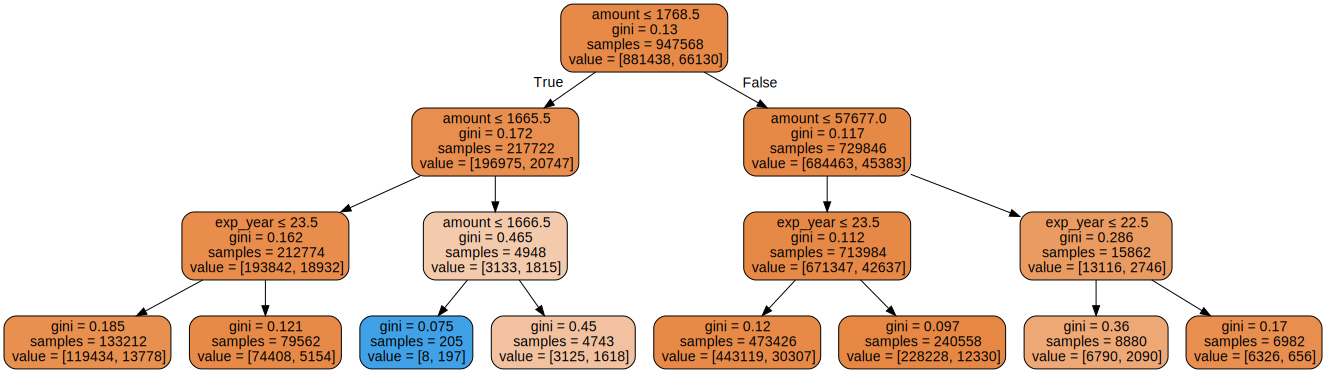

In [564]:
dot_data = tree.export_graphviz(tree_clf, out_file = None, 
                         feature_names = X.columns,  
                         class_names = y.name,  
                         filled = True, rounded = True,  
                         special_characters = True)  

graph = graphviz.Source(dot_data)  

graph 

podemos ver que, aduerdo con el árbol de decisiones, para que ocurra un fraude:
a) el amount debe ser menor o igual a 1768.5
b) el amount debe ser menor o igual a 1666.5
c) la fecha de expedición de la tarjeta debe ser menor o igual a 23.5

Predicciónes para hacer pruebas

In [565]:
y_pred = tree_clf.predict(x_test)

Y algunas medidas de qué tan bien clasificamos

In [566]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.9309558786282357


In [567]:
print(confusion_matrix(y_test, y_pred))

[[220502      1]
 [ 16355     34]]


In [568]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    220503
           1       0.97      0.00      0.00     16389

    accuracy                           0.93    236892
   macro avg       0.95      0.50      0.48    236892
weighted avg       0.93      0.93      0.90    236892



podemos ver entonces que con las columnas que tomamos, este modelo tiene una precisión del 93%, lo que significa que es un muy buen modelo para describir las propiedades requeridas para que se de un fraude.

b) power users que de manera recurrente compran en nuestras compañías y a quienes les podemos hacer promociones.

Para encontrar a los power users, volvemos a tomar nuestros datos originales.

In [569]:
XFORCE

,charge_id,company_id,company_name,created_at,paid_at,amount,status,fraud_status,failure_code,email_hash,device_hash,card,exp_year,exp_month
0,6878a36a40772b99fd62ebf51747f6d899e4d30c,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-01 00:00:10,NaN,300,pending_payment,A,card_declined,beb58e5aec408bfc244b39e972bb2b0719513f0d,2c631eb2eb054111b437ec548b7e309692e95bf9,1081edc2a9cd9a87ab345f13776796c38266ab28,27,08
1,f91937ed60f566e1bd9cc5628d264a1bc15f8b31,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-01 00:00:16,NaN,300,voided,A,NaN,a3d7e6fd32e706d85f84a9ad7364081a24f6f168,1bdbc502d83c448c6395fef162a1d8f239aa347a,db64f19126cc558ed69e1820590cd615ba62e13d,24,02
2,4528b3e759653aed8bedda5048e12d22f847e623,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-01 00:00:17,NaN,300,voided,A,NaN,eae861e2c64387c16c37590ebe85712ad8e746ec,fe589254feb7059314501a2ad4d292f16aca9ec7,4437ff06a9e6766a30a27537c30545268d13d7b8,22,02
3,b96fcec82652fd41b9cbbc99e443209e09c749cf,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-01 00:01:14,NaN,300,pending_payment,A,card_declined,881b7f6486eb67732332fc9e09af07cc4719deb9,56065b7a7a9b062934cc0d6006c3228b78f53004,f7712c4a644e3d9cbea1885c88b550beebca1c49,27,08
4,c4e6b7d80d51a7c997667f16b7847476ce9124cc,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-01 00:01:50,NaN,300,pending_payment,A,card_declined,6522a29464eca0a9c92bac20df9f243e576bf30b,5a226085ee2474d0a6ef9eb81c210fdb24803ec3,6225e1f098d8b189e1fc27f9daafc123b3ae23ec,24,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184455,3d2cb1961964d03409b35e29947c600b138bbe2c,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-24 00:14:42,NaN,300,pre_authorized,A,NaN,db2b3c65618e8e5d73c2cb2cd81b7990e2f5494d,1eb7627838d6ff329c942dfb5b1c63feab860457,a95eabcab7d76b31dcb3387161d899b2b06dde09,21,08
1184456,bbe7538073eec7765fd4e793f07e0cb9353b726d,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-24 00:14:57,NaN,300,pending_payment,D,suspected_fraud,fb539e3c6a9243d3a059f1ac1235d7b3882383e8,4f7515605fb66df0239f65512547860bc33a76d6,f5fac288f1955f7a7095d786ecee847b3425147a,24,09
1184457,a3b0474825f604befa3e999cabf12fe2ae8de725,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-24 00:15:44,NaN,300,pre_authorized,A,NaN,8b9b687f1159fd04c093e15eb246a706d21c46e8,d7fcb96139d314097da4e49b225801706734c5bc,b61f211acb4f6eb61e864872aa85938f6af9814b,20,04
1184458,116726990010812ed5cf602747f7b1d77e23d888,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-24 00:12:44,NaN,9400,pre_authorized,A,NaN,26de30fb99e6cc7077124c5179d8240ba5a387e6,35f84f630626157cb7eb875468e2e610dcce75d7,1da8446abb85fe9cb4ba589bd31793f45fad90e1,23,10


en este caso, vamos a ver si se repite el email_hash, el device_hash, card y de estos, los que tengan mayor cantidad de amount son los power users

In [590]:
XFORCE['device_hash'].describe()

count                                      1183681
unique                                     1123327
top       3fe02c718d0e0f71c22f192ea25ae4023aa3870a
freq                                            63
Name: device_hash, dtype: object

In [573]:
XFORCE['email_hash'].describe()

count                                      1184460
unique                                      242098
top       66d3b7a44ec6fb87c6a14f0f6d41659988255b3a
freq                                          3145
Name: email_hash, dtype: object

In [574]:
XFORCE['card'].describe()

count                                      1183568
unique                                      201286
top       24460bf76e22e192a56a6ed2d657eac657a33795
freq                                          3165
Name: card, dtype: object

localicemos a estos 3 elementos que más se repiten

In [576]:
XFORCE.loc[XFORCE['device_hash'] == '3fe02c718d0e0f71c22f192ea25ae4023aa3870a']

,charge_id,company_id,company_name,created_at,paid_at,amount,status,fraud_status,failure_code,email_hash,device_hash,card,exp_year,exp_month
64816,53759df078e838fb6aafd710de16736b1fa5c8c3,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-13 13:33:52,NaN,300,pending_payment,D,suspected_fraud,2d18287c19a745ea881bb88e04e307b811bd2e15,3fe02c718d0e0f71c22f192ea25ae4023aa3870a,bdbebd74368ccfedc45e0d29a45bc9fd9af6beda,22,06
72127,c42cfa13298181559d316afcff3a76b014d5d0a9,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-15 14:05:16,NaN,300,pending_payment,D,suspected_fraud,2d18287c19a745ea881bb88e04e307b811bd2e15,3fe02c718d0e0f71c22f192ea25ae4023aa3870a,bdbebd74368ccfedc45e0d29a45bc9fd9af6beda,22,06
77671,9b94f435ee9722feee73a32630e1b12447e8f85d,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-15 13:55:15,NaN,300,pending_payment,D,suspected_fraud,2d18287c19a745ea881bb88e04e307b811bd2e15,3fe02c718d0e0f71c22f192ea25ae4023aa3870a,bdbebd74368ccfedc45e0d29a45bc9fd9af6beda,22,06
109257,2344b1d04dac3eca44f4c8b3a82fb223e423177d,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-13 13:08:07,NaN,300,pending_payment,D,suspected_fraud,2d18287c19a745ea881bb88e04e307b811bd2e15,3fe02c718d0e0f71c22f192ea25ae4023aa3870a,bdbebd74368ccfedc45e0d29a45bc9fd9af6beda,22,06
110310,df10d427db1f0ef599ad8a095b801cf14d195c02,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-13 23:39:29,NaN,300,pending_payment,D,suspected_fraud,2d18287c19a745ea881bb88e04e307b811bd2e15,3fe02c718d0e0f71c22f192ea25ae4023aa3870a,bdbebd74368ccfedc45e0d29a45bc9fd9af6beda,22,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098233,ec51bfce87503d1d13fcdde41dfdabddcdd5e095,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-11-15 13:05:25,NaN,300,pending_payment,D,suspected_fraud,2d18287c19a745ea881bb88e04e307b811bd2e15,3fe02c718d0e0f71c22f192ea25ae4023aa3870a,bdbebd74368ccfedc45e0d29a45bc9fd9af6beda,22,06
1104287,7b781c4376992b9a3b32eb076a244ec4b6250e3c,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-11-15 22:58:40,NaN,300,pending_payment,D,suspected_fraud,2d18287c19a745ea881bb88e04e307b811bd2e15,3fe02c718d0e0f71c22f192ea25ae4023aa3870a,bdbebd74368ccfedc45e0d29a45bc9fd9af6beda,22,06
1120274,5e3f881768c16cef136af5a0f4c77e303a433924,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-20 13:54:28,NaN,300,voided,A,NaN,2d18287c19a745ea881bb88e04e307b811bd2e15,3fe02c718d0e0f71c22f192ea25ae4023aa3870a,bef7270afe77ca8374fe4251c288f662a720d5a5,23,06
1157760,f35884fc6ae9019b93b8074e9602769ebb3f7d8b,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-05 13:57:48,NaN,300,voided,A,NaN,2d18287c19a745ea881bb88e04e307b811bd2e15,3fe02c718d0e0f71c22f192ea25ae4023aa3870a,c9c543261b908365b79816752f53b75a2a908aff,21,03


In [577]:
XFORCE.loc[XFORCE['email_hash'] == '66d3b7a44ec6fb87c6a14f0f6d41659988255b3a']

,charge_id,company_id,company_name,created_at,paid_at,amount,status,fraud_status,failure_code,email_hash,device_hash,card,exp_year,exp_month
513,2d315c400f35e8048b2159e67a0095a4867d9b77,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-01 05:41:50,2019-09-01 05:41:54,27906,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,0270c6641adab868649606303b05a8511e97609c,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
2945,5abf49e37cd9aee601090431a930e21dc94eea1c,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-02 06:02:58,2019-09-02 06:03:02,10636,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,f2a043c8d9354b15e6c57ab408183190e4bd9106,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
4777,0cd88f6352dc762b6bb03f898f3fc63930cf8435,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-02 21:47:59,2019-09-02 21:48:03,10322,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,38ff03ca7470e3fce51ce440319bfb4036c2f3f1,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
8107,279b2acbcd4ec58163bc3ac8a8642c5210666917,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-03 03:04:42,2019-09-03 03:04:46,6000,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,3279ed48d8de04390af99d7fca3744a134f2e86b,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
8301,c9ca924c4baa577928c0e519a172890ebd6aac24,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-03 05:18:01,2019-09-03 05:18:05,10248,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,688935155f32681fbe6dc78fabf534de6e35fd8e,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181599,f952974f4998822398432dec0591f0b515203398,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-21 12:45:13,2019-12-21 12:45:15,6000,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,25bf286ecf509f3a17bb7fb00a83435efc822bd6,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
1181606,29b6ae22f18f62e2058c99f373487dd2edf18f6d,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-21 13:09:52,2019-12-21 13:09:54,37517,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,21ba7cbe2955bd80e72424eabd97abc0cb978110,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
1182087,3019b49fbf7db2068aa110409fd6440ea756167b,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-22 08:02:27,2019-12-22 08:02:28,47209,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,85ca9b3d700f8bdb32c3221168a2b0b452a5c32c,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
1182455,58f19d7a2f9ed2888dc77602e43adca71bba5ac8,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-22 06:08:32,2019-12-22 06:08:34,6648,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,0369d2ed4f2f30efab5d703bf0e3536abeafe979,24460bf76e22e192a56a6ed2d657eac657a33795,22,04


In [578]:
XFORCE.loc[XFORCE['card'] == '24460bf76e22e192a56a6ed2d657eac657a33795']

,charge_id,company_id,company_name,created_at,paid_at,amount,status,fraud_status,failure_code,email_hash,device_hash,card,exp_year,exp_month
513,2d315c400f35e8048b2159e67a0095a4867d9b77,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-01 05:41:50,2019-09-01 05:41:54,27906,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,0270c6641adab868649606303b05a8511e97609c,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
2945,5abf49e37cd9aee601090431a930e21dc94eea1c,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-02 06:02:58,2019-09-02 06:03:02,10636,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,f2a043c8d9354b15e6c57ab408183190e4bd9106,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
3204,3fde7c7255b459ccb01d721dbd8f7e5505ba7163,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-02 10:37:29,2019-09-02 10:37:30,961359,paid,A,NaN,19b9804b14112c1db75dc113cf147f1df74c176b,931b6bbc7d8d246638ce00fe2866b5e5f56e2674,24460bf76e22e192a56a6ed2d657eac657a33795,22,10
4777,0cd88f6352dc762b6bb03f898f3fc63930cf8435,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-02 21:47:59,2019-09-02 21:48:03,10322,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,38ff03ca7470e3fce51ce440319bfb4036c2f3f1,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
8107,279b2acbcd4ec58163bc3ac8a8642c5210666917,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-03 03:04:42,2019-09-03 03:04:46,6000,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,3279ed48d8de04390af99d7fca3744a134f2e86b,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181599,f952974f4998822398432dec0591f0b515203398,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-21 12:45:13,2019-12-21 12:45:15,6000,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,25bf286ecf509f3a17bb7fb00a83435efc822bd6,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
1181606,29b6ae22f18f62e2058c99f373487dd2edf18f6d,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-21 13:09:52,2019-12-21 13:09:54,37517,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,21ba7cbe2955bd80e72424eabd97abc0cb978110,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
1182087,3019b49fbf7db2068aa110409fd6440ea756167b,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-22 08:02:27,2019-12-22 08:02:28,47209,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,85ca9b3d700f8bdb32c3221168a2b0b452a5c32c,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
1182455,58f19d7a2f9ed2888dc77602e43adca71bba5ac8,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-22 06:08:32,2019-12-22 06:08:34,6648,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,0369d2ed4f2f30efab5d703bf0e3536abeafe979,24460bf76e22e192a56a6ed2d657eac657a33795,22,04


Veamos si se repiten estos valores en algunas de las 3 columnas

email_hash, device_hash y card

In [579]:
XFORCE.loc[(XFORCE['device_hash'] == '3fe02c718d0e0f71c22f192ea25ae4023aa3870a') & (XFORCE['email_hash'] == '66d3b7a44ec6fb87c6a14f0f6d41659988255b3a') & (XFORCE['card'] == '24460bf76e22e192a56a6ed2d657eac657a33795')]

,charge_id,company_id,company_name,created_at,paid_at,amount,status,fraud_status,failure_code,email_hash,device_hash,card,exp_year,exp_month


device_hash y email_hash

In [580]:
XFORCE.loc[(XFORCE['device_hash'] == '3fe02c718d0e0f71c22f192ea25ae4023aa3870a') & (XFORCE['email_hash'] == '66d3b7a44ec6fb87c6a14f0f6d41659988255b3a')]

,charge_id,company_id,company_name,created_at,paid_at,amount,status,fraud_status,failure_code,email_hash,device_hash,card,exp_year,exp_month


email_hash y card

In [581]:
XFORCE.loc[(XFORCE['email_hash'] == '66d3b7a44ec6fb87c6a14f0f6d41659988255b3a') & (XFORCE['card'] == '24460bf76e22e192a56a6ed2d657eac657a33795')]

,charge_id,company_id,company_name,created_at,paid_at,amount,status,fraud_status,failure_code,email_hash,device_hash,card,exp_year,exp_month
513,2d315c400f35e8048b2159e67a0095a4867d9b77,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-01 05:41:50,2019-09-01 05:41:54,27906,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,0270c6641adab868649606303b05a8511e97609c,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
2945,5abf49e37cd9aee601090431a930e21dc94eea1c,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-02 06:02:58,2019-09-02 06:03:02,10636,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,f2a043c8d9354b15e6c57ab408183190e4bd9106,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
4777,0cd88f6352dc762b6bb03f898f3fc63930cf8435,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-02 21:47:59,2019-09-02 21:48:03,10322,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,38ff03ca7470e3fce51ce440319bfb4036c2f3f1,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
8107,279b2acbcd4ec58163bc3ac8a8642c5210666917,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-03 03:04:42,2019-09-03 03:04:46,6000,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,3279ed48d8de04390af99d7fca3744a134f2e86b,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
8301,c9ca924c4baa577928c0e519a172890ebd6aac24,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-09-03 05:18:01,2019-09-03 05:18:05,10248,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,688935155f32681fbe6dc78fabf534de6e35fd8e,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181599,f952974f4998822398432dec0591f0b515203398,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-21 12:45:13,2019-12-21 12:45:15,6000,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,25bf286ecf509f3a17bb7fb00a83435efc822bd6,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
1181606,29b6ae22f18f62e2058c99f373487dd2edf18f6d,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-21 13:09:52,2019-12-21 13:09:54,37517,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,21ba7cbe2955bd80e72424eabd97abc0cb978110,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
1182087,3019b49fbf7db2068aa110409fd6440ea756167b,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-22 08:02:27,2019-12-22 08:02:28,47209,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,85ca9b3d700f8bdb32c3221168a2b0b452a5c32c,24460bf76e22e192a56a6ed2d657eac657a33795,22,04
1182455,58f19d7a2f9ed2888dc77602e43adca71bba5ac8,cbf1c8b09cd5b549416d49d220a40cbd317f952e,taxify,2019-12-22 06:08:32,2019-12-22 06:08:34,6648,paid,A,NaN,66d3b7a44ec6fb87c6a14f0f6d41659988255b3a,0369d2ed4f2f30efab5d703bf0e3536abeafe979,24460bf76e22e192a56a6ed2d657eac657a33795,22,04


device_hash y card

In [582]:
XFORCE.loc[(XFORCE['device_hash'] == '3fe02c718d0e0f71c22f192ea25ae4023aa3870a') & (XFORCE['card'] == '24460bf76e22e192a56a6ed2d657eac657a33795')]

,charge_id,company_id,company_name,created_at,paid_at,amount,status,fraud_status,failure_code,email_hash,device_hash,card,exp_year,exp_month


podemos ver que, en general, hay 3 power users:
a) de acuerdo con el email_hash, es el elemento que aparece por primera vez en el lugar 513
b) de acuerdo con el device_hash es el elemento que aparece por primera vez en el lugar 64816
c) de acuerdo con card, es el elemento que aparece por primra vez en el lugar 513

Entonces, podemos ver que hay un power user, el cual aparece por primera vez en el lugar 513, al cual se le pueden dar promociones.